Excercise 13

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats

a)

In [3]:
np.random.seed(1)
X = np.random.normal(0, 1, 100)

In [4]:
print(X[:10])
print("Len of X:", len(X))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
Len of X: 100


b)

In [19]:
eps = np.random.normal(0, 0.25, 100)

c)

In [27]:
Y = -1 + X*0.5 + eps

In [28]:
print(Y[:10])
print("Len of Y:", len(Y))
beta0 = -1
beta1 = 0.5
print(f"Beta0 = {beta0}, Beta1 = {beta1}")

[-0.84109435 -1.26768797 -1.08046997 -0.92003471 -0.77872467 -2.10753715
 -1.19882748 -1.79568788 -0.61467248 -0.57259802]
Len of Y: 100
Beta0 = -1, Beta1 = 0.5


d)

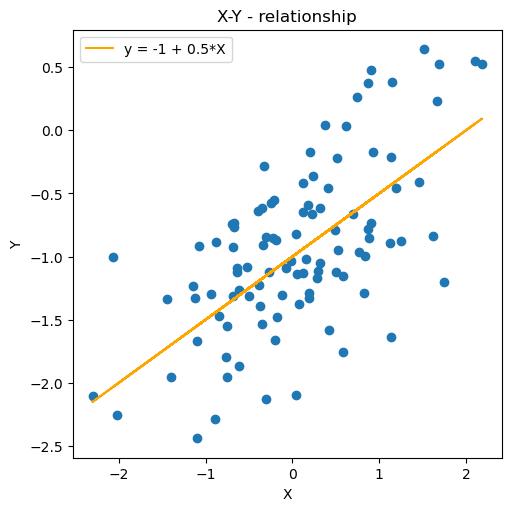

In [29]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.scatter(X, Y)
ax.plot(X, beta0 + beta1*X, label=f"y = {beta0} + {beta1}*X", color="orange")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X-Y - relationship")
ax.legend()
plt.show()
#Comment: Data behaves as model predicted

e)

In [30]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

#    beta1_hat = sum(xi - x_mean)(yi - y_mean) / sum(xi - x_mean)^2
#    beta0_hat = yhat - beta1_hat * x_mean

beta1_hat = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
beta0_hat = y_mean - beta1_hat * x_mean

print(f"beta0_hat = {beta0_hat:.4f}")
print(f"beta1_hat = {beta1_hat:.4f}")

beta0_hat = -0.9662
beta1_hat = 0.4730


f)

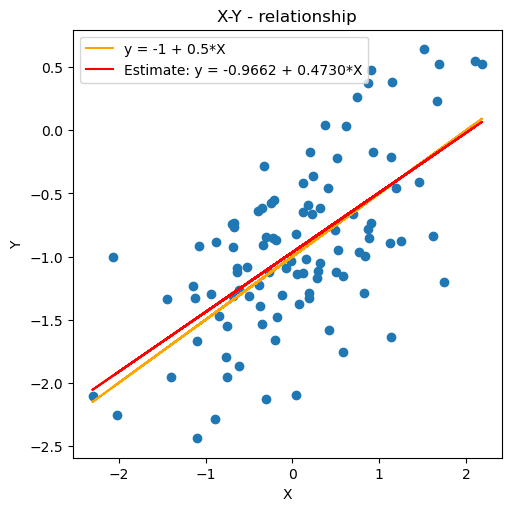

In [31]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.scatter(X, Y)
ax.plot(X, beta0 + beta1*X, label=f"y = {beta0} + {beta1}*X", color="orange")
ax.plot(X, beta0_hat + beta1_hat*X, label=f"Estimate: y = {beta0_hat:.4f} + {beta1_hat:.4f}*X", color="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X-Y - relationship")
ax.legend()
plt.show()

g)

In [32]:
reshapedX = X.reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(reshapedX)  # columns: [1, x, x^2]

model = LinearRegression().fit(X_poly, Y)
print("Estimated coefficients:", model.intercept_, model.coef_[1:])

model_lin = LinearRegression().fit(reshapedX, Y)
print("Linear R^2:", model_lin.score(reshapedX, Y))
print("Quadratic R^2:", model.score(X_poly, reshapedX))

Estimated coefficients: -1.0002791221644496 [0.46785195 0.04370132]
Linear R^2: 0.39583220724955337
Quadratic R^2: -0.5522691833687157


.score explained:  
 - 1.0 - perfect score  
 - 0.0 - as good as mean  
 - below 0.0 - worse than horizontal line

h)

In [12]:
eps = np.random.normal(0, 0.05, 100)

Data follows more closely the linear regression. The estimated values for Beta0 and Beta1 are closer to truth.

i)

In [26]:
eps = np.random.normal(0, 0.5, 100)

Data is more scattered, the estimation of Betas became slightly worse.

j)

In [37]:
def fit_and_ci(noise_std):
    np.random.seed(1)
    x = np.random.normal(0, 1, 100)
    eps = np.random.normal(0, noise_std, 100)
    y = -1 + 0.5 * x + eps

    # Fit model
    X = x.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # Residuals and stats
    n = len(x)
    p = 2  # intercept + slope
    residuals = y - y_pred
    s2 = np.sum(residuals**2) / (n - p)  # residual variance
    x_mean = np.mean(x)
    s_xx = np.sum((x - x_mean)**2)

    # Standard errors
    se_b1 = np.sqrt(s2 / s_xx)
    se_b0 = np.sqrt(s2 * (1/n + x_mean**2 / s_xx))

    # 95% confidence intervals
    t_val = stats.t.ppf(0.975, df=n - p)
    ci_b0 = (model.intercept_ - t_val*se_b0, model.intercept_ + t_val*se_b0)
    ci_b1 = (model.coef_[0] - t_val*se_b1, model.coef_[0] + t_val*se_b1)

    return model.intercept_, model.coef_[0], ci_b0, ci_b1

In [36]:
original = fit_and_ci(noise_std=0.5)
less_noise = fit_and_ci(noise_std=0.25)
more_noise = fit_and_ci(noise_std=1.0)

print("Original noise (σ=0.5):")
print(f"  β₀̂ = {original[0]:.3f}, 95% CI = {original[2]}")
print(f"  β₁̂ = {original[1]:.3f}, 95% CI = {original[3]}\n")

print("Less noise (σ=0.25):")
print(f"  β₀̂ = {less_noise[0]:.3f}, 95% CI = {less_noise[2]}")
print(f"  β₁̂ = {less_noise[1]:.3f}, 95% CI = {less_noise[3]}\n")

print("More noise (σ=1.0):")
print(f"  β₀̂ = {more_noise[0]:.3f}, 95% CI = {more_noise[2]}")
print(f"  β₁̂ = {more_noise[1]:.3f}, 95% CI = {more_noise[3]}")


Original noise (σ=0.5):
  β₀̂ = -0.926, 95% CI = (-1.0197409646810802, -0.8332455056207176)
  β₁̂ = 0.548, 95% CI = (0.44261337684768415, 0.6528137568034872)

Less noise (σ=0.25):
  β₀̂ = -0.963, 95% CI = (-1.0098704823405402, -0.916622752810359)
  β₁̂ = 0.524, 95% CI = (0.471306688423842, 0.5764068784017435)

More noise (σ=1.0):
  β₀̂ = -0.853, 95% CI = (-1.0394819293621609, -0.6664910112414357)
  β₁̂ = 0.595, 95% CI = (0.38522675369536863, 0.8056275136069748)
